In [3]:
import numpy as np
import pandas as pd

In [34]:
d3=pd.read_csv('./tmp_key2.csv')

In [35]:
d3.dropna()

,book_name,book_ratings,book_number_of_reviews,book_price,book_discount,book_author,day,month,year,years_launched,keyword,keyword2
0,Python 3 Object-Oriented Programming: Build ro...,4.4,201,4770,0,by Dusty Phillips,30,October,2018,4,['python object oriented'],['python']
1,Learning RStudio for R Statistical Computing,3.7,13,1828,0,by Mark van der Loo and Edwin de Jonge,24,December,2012,10,['learning rstudio statistical'],['rstudio']
2,Socket.io Real-time Web Application Development,3.2,4,2243,0,by Rohit Rai,22,February,2013,9,['real time web'],['socket']
3,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0,1,220,0,by Francesco Trucchia and Francesco Fullone,20,October,2009,13,['publish enterprise web'],['publish']
4,Robot Framework Test Automation,2.9,17,1828,0,by Sumit Bisht,25,October,2013,9,['robot framework test'],['automation']
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,Hands-On Python Deep Learning for the Web: Int...,5.0,3,2466,20,by Anubhav Singh and Sayak Paul,15,May,2020,2,['machine learning opencv'],['opencv']
1067,R Deep Learning Essentials: A step-by-step gui...,4.1,8,2464,20,by Mark Hodnett and Joshua F. Wiley,24,August,2018,4,['driven design php'],['php']
1068,Mastering Git,4.3,8,3100,20,by Jakub Narebski,6,January,2016,6,['application development python'],['python']
1069,Machine Learning for OpenCV: Intelligent image...,3.8,13,3100,20,by Michael Beyeler,14,July,2017,5,['mastering windows presentation'],['presentation']


In [36]:
dat=d3[['keyword2','book_ratings']]
words=dat['keyword2'].unique()
bar = pd.DataFrame(columns=["keyword","Avg_rating"])

In [37]:
for i in words[:-1]:
    temp=dat[dat['keyword2']==i]
    rating=0
    for index, row in temp.iterrows():
        rating=rating+row['book_ratings']
    bar.loc[len(bar.index)] = [i,rating/len(temp)]    

In [54]:
score_d=d3[["book_ratings","book_number_of_reviews","book_price","years_launched"]]

In [55]:
score_d["class"]=round(score_d["book_ratings"])

In [56]:
score_d

,book_ratings,book_number_of_reviews,book_price,years_launched,class
0,4.4,201,4770,4,4.0
1,3.7,13,1828,10,4.0
2,3.2,4,2243,9,3.0
3,1.0,1,220,13,1.0
4,2.9,17,1828,9,3.0
...,...,...,...,...,...
1069,3.8,13,3100,5,4.0
1070,4.4,24,2654,5,4.0
1071,4.0,2,3100,4,4.0
1072,3.7,36,2963,5,4.0


In [57]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

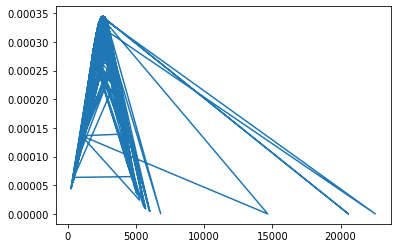

In [58]:
x_axis = np.array(score_d['book_price'])
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [59]:
q1=mean-(sd*2)
q2=mean-sd
q3=mean
q4=mean+sd
q5=mean+(sd*2)

In [60]:
x_axis = np.array(score_d['years_launched'])
  
# Calculating mean and standard deviation
mean1 = statistics.mean(x_axis)
sd1 = statistics.stdev(x_axis)
print(mean1,sd1)
print(statistics.mode(x_axis))

3 2.6457513110645907
4


In [61]:
def settle_price_score(x):
    if x>0 and x<q1:
        return 1
    elif x>q1 and x<q2:
        return 3
    elif x>q2 and x<q4:
        return 5
    elif x>q4 and x<q5:
        return 4
    elif x>q5:
        return 2
    
def settle_n_rating_score(x):
    if x>0 and x<=6:
        return 1
    elif x>6 and x<22:
        return 2
    elif x>=22 and x<34:
        return 3
    elif x>=34 and x<50:
        return 4
    elif x>=50:
        return 5
def settle_year_score(x):
    if x>=0 and x<=2:
        return 5
    elif x>2 and x<=4:
        return 4
    elif x>4 and x<=6:
        return 3
    elif x>6 and x<=7:
        return 2
    elif x>7:
        return 1

In [62]:
x1=[]
x2=[]
x3=[]
for index, row in score_d.iterrows():
        x1.append(settle_price_score(row['book_price']))
        x2.append(settle_n_rating_score(row['book_number_of_reviews']))
        x3.append(settle_year_score(row['years_launched']))
score_d['Price_score']=np.array(x1)
score_d['number_of_reviews_score']=np.array(x2)
score_d['year_score']=np.array(x3)

In [63]:
score_d

,book_ratings,book_number_of_reviews,book_price,years_launched,class,Price_score,number_of_reviews_score,year_score
0,4.4,201,4770,4,4.0,4,5,4
1,3.7,13,1828,10,4.0,5,2,1
2,3.2,4,2243,9,3.0,5,1,1
3,1.0,1,220,13,1.0,1,1,1
4,2.9,17,1828,9,3.0,5,2,1
...,...,...,...,...,...,...,...,...
1069,3.8,13,3100,5,4.0,5,2,3
1070,4.4,24,2654,5,4.0,5,3,3
1071,4.0,2,3100,4,4.0,5,1,4
1072,3.7,36,2963,5,4.0,5,4,3


In [64]:
scor=[]
for index, row in score_d.iterrows():
    try:
        s=(row["class"]+row["Price_score"]+row["number_of_reviews_score"]+row["year_score"])/4
        s=s*20
        scor.append(s)
    except:
        print(row["class"],row["Price_score"],row["number_of_reviews_score"],row["year_score"],row["years_launched"])

In [65]:
score_d['book_score']=np.array(scor)

In [66]:
score_d

,book_ratings,book_number_of_reviews,book_price,years_launched,class,Price_score,number_of_reviews_score,year_score,book_score
0,4.4,201,4770,4,4.0,4,5,4,85.0
1,3.7,13,1828,10,4.0,5,2,1,60.0
2,3.2,4,2243,9,3.0,5,1,1,50.0
3,1.0,1,220,13,1.0,1,1,1,20.0
4,2.9,17,1828,9,3.0,5,2,1,55.0
...,...,...,...,...,...,...,...,...,...
1069,3.8,13,3100,5,4.0,5,2,3,70.0
1070,4.4,24,2654,5,4.0,5,3,3,75.0
1071,4.0,2,3100,4,4.0,5,1,4,70.0
1072,3.7,36,2963,5,4.0,5,4,3,80.0


In [72]:
d3=d3.drop(['day','month','year','keyword'],axis=1)

In [73]:
d3["Book_score"]=np.array(scor)

In [74]:
d3

,book_name,book_ratings,book_number_of_reviews,book_price,book_discount,book_author,years_launched,keyword2,Book_score
0,Python 3 Object-Oriented Programming: Build ro...,4.4,201,4770,0,by Dusty Phillips,4,['python'],85.0
1,Learning RStudio for R Statistical Computing,3.7,13,1828,0,by Mark van der Loo and Edwin de Jonge,10,['rstudio'],60.0
2,Socket.io Real-time Web Application Development,3.2,4,2243,0,by Rohit Rai,9,['socket'],50.0
3,eZ Publish 4: Enterprise Web Sites Step-by-Step,1.0,1,220,0,by Francesco Trucchia and Francesco Fullone,13,['publish'],20.0
4,Robot Framework Test Automation,2.9,17,1828,0,by Sumit Bisht,9,['automation'],55.0
...,...,...,...,...,...,...,...,...,...
1069,Machine Learning for OpenCV: Intelligent image...,3.8,13,3100,20,by Michael Beyeler,5,['presentation'],70.0
1070,Domain-Driven Design in PHP: A Highly Practica...,4.4,24,2654,24,"by Carlos Buenosvinos, Christian Soronellas, e...",5,['iot'],75.0
1071,Hands-On Enterprise Application Development wi...,4.0,2,3100,20,by Saurabh Badhwar,4,NaN,70.0
1072,Mastering Windows Presentation Foundation: Mas...,3.7,36,2963,31,by Sheridan Yuen,5,NaN,80.0


In [75]:
d3.to_csv("Final_data_with_score.csv")

In [77]:
data=d3[['book_ratings', 'book_number_of_reviews', 'book_price','years_launched','Book_score']]

In [79]:
x=data[['book_ratings', 'book_number_of_reviews', 'book_price','years_launched']]
y=data[['Book_score']]

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,random_state=0)

In [84]:
from sklearn.linear_model import LinearRegression

LR_reg = LinearRegression()
LR_reg.fit(x_train,y_train)
y1_prediction =  LR_reg.predict(x_test)

In [103]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print('r2 socre is',r2_score(y_test,y1_prediction))
print('mean_absolute_error',mean_absolute_error(y1_prediction,y_test))

r2 socre is 0.6852363695698488
mean_absolute_error 4.99984514549647


In [106]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor()
DT_reg.fit(x_train,y_train)
y2_prediction = DT_reg.predict(x_test)


In [107]:
print('r2 socre is',r2_score(y_test,y2_prediction))
print('mean_absolute_error',mean_absolute_error(y2_prediction,y_test))

r2 socre is 0.9412498693826872
mean_absolute_error 0.9567901234567902


In [108]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(random_state=0)
RF_reg.fit(x_train,y_train)
y3_prediction = RF_reg.predict(x_test)

In [109]:
print('r2 socre is',r2_score(y_test,y3_prediction))
print('mean_absolute_error',mean_absolute_error(y3_prediction,y_test))

r2 socre is 0.9553721062886857
mean_absolute_error 1.0774691358024686


In [111]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

SVM_reg = make_pipeline(SVR(C=1.0, epsilon=0.2))
SVM_reg.fit(x_train,y_train)
y4_prediction = SVM_reg.predict(x_test)

In [112]:
print('r2 socre is',r2_score(y_test,y4_prediction))
print('mean_absolute_error',mean_absolute_error(y4_prediction,y_test))

r2 socre is 0.1378035253326465
mean_absolute_error 9.433008207745068
